In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Uni_linear.txt",header=None)
data.head()

FileNotFoundError: [Errno 2] File Uni_linear.txt does not exist: 'Uni_linear.txt'

In [ ]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,5))
plt.xlabel("População da Cidade (10k habitantes)")
plt.ylabel("Lucro (R$10k)")
plt.title("Lucro por população")

In [6]:
def computeCost(X,y,theta):
    m = len(y)
    h = X.dot(theta) # X*theta
    J = 1/(2*m)*(np.sum((h-y)**2))
    return J

In [2]:
def gradientDescent(X,y,theta,alpha,nbr_iter):
    J_history = []
    m = len(y)
    for i in range(nbr_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m)*(X.T.dot(h-y))
        J_history.append(computeCost(X,y,theta))
        
    return theta,J_history

In [3]:
X,y = data[0].values,data[1].values
m = X.shape[0]
X = np.append(np.ones([m,1]),X.reshape(m,1),axis=1)
y = y.reshape(m,1)
theta = np.zeros([2,1])

NameError: name 'data' is not defined

In [7]:
cost = computeCost(X,y,theta)
print(cost)

32.072733877455676


In [8]:
nbr_iter = 1500
alpha = 0.01
new_theta,J_history = gradientDescent(X,y,theta,alpha,nbr_iter)
print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


In [9]:
new_cost = computeCost(X,y,new_theta)
print(new_cost)

4.483388256587725


Text(0.5, 1.0, 'Dados de Treinamento Ajustados por Regressão Linear')

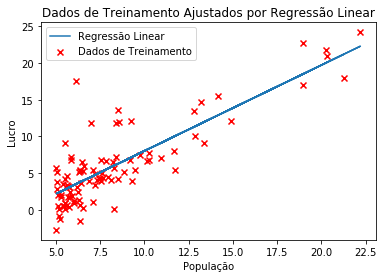

In [10]:
plt.scatter(X[:,1],y,c='red',marker='x',label='Dados de Treinamento')
plt.plot(X[:,1],np.dot(X,new_theta),label='Regressão Linear')
plt.ylabel('Lucro')
plt.xlabel('População')
plt.legend()
plt.title('Dados de Treinamento Ajustados por Regressão Linear')

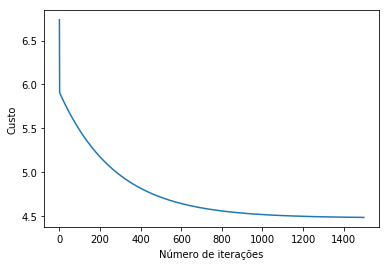

In [11]:
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.show()

In [12]:
def prediction(X,new_theta):
    pred = np.dot(X,new_theta)
    return pred

In [13]:
predict1 = prediction(np.array([1,3.5]),new_theta)*10000
print("Para uma população de 35000, o modelo prevê um lucro de R$" + str(round(predict1[0],2)))

Para uma população de 35000, o modelo prevê um lucro de R$4519.77


In [14]:
predict2 = prediction(np.array([1,7]),new_theta)*10000
print("Para uma população de 70000, o modelo prevê um lucro de R$" + str(round(predict2[0],2)))

Para uma população de 70000, o modelo prevê um lucro de R$45342.45
